In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.3/896.3 kB 30.2 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import os
import cv2
import json
import matplotlib.pyplot as plt
from pathlib import Path

# Load the YOLOv8 model
model = YOLO('yolov8n.pt')  # Replace with 'yolov8m.pt' or a fine-tuned model if available

In [ ]:
# Define the source images directory
images_dir = "/content/images"
output_dir = "/content/annotations"

# Create directories if they don't exist
os.makedirs(images_dir, exist_ok=True)
os.makedirs(output_dir, exist_ok=True)

In [ ]:
# Detect and Save Annotations
for img_file in os.listdir(images_dir):
    img_path = os.path.join(images_dir, img_file)
    if img_file.endswith(('.jpg', '.jpeg', '.png')):
        # Run detection
        results = model(img_path)

        # Process each result (usually one result per image)
        for result in results:
            # Ensure annotations directory exists
            os.makedirs(output_dir, exist_ok=True)

            # Construct the output path for annotations
            json_path = os.path.join(output_dir, Path(img_file).stem + ".json")

            # Prepare a list to hold all detections for this image
            detections = []

            for box in result.boxes:
                # Extract class, confidence, and bounding box information
                class_id = int(box.cls)
                confidence = box.conf.item()
                x_center, y_center, width, height = box.xywhn.tolist()[0]

                # Append detection info to the list
                detections.append({
                    "class_id": class_id,
                    "confidence": confidence,
                    "x_center": x_center,
                    "y_center": y_center,
                    "width": width,
                    "height": height
                })

            # Save detections to a JSON file
            with open(json_path, "w") as f:
                json.dump({"image": img_file, "detections": detections}, f, indent=4)

        # Print progress
        print(f"Processed and annotated: {img_file}")

print(f"Annotations saved as JSON in {output_dir}")


image 1/1 /content/images/6.PNG: 544x640 1 truck, 197.5ms
Speed: 4.2ms preprocess, 197.5ms inference, 1.6ms postprocess per image at shape (1, 3, 544, 640)
Processed and annotated: 6.PNG

image 1/1 /content/images/2.PNG: 544x640 1 car, 217.9ms
Speed: 3.0ms preprocess, 217.9ms inference, 1.7ms postprocess per image at shape (1, 3, 544, 640)
Processed and annotated: 2.PNG

image 1/1 /content/images/4.PNG: 576x640 2 cars, 1 truck, 228.4ms
Speed: 3.4ms preprocess, 228.4ms inference, 1.4ms postprocess per image at shape (1, 3, 576, 640)
Processed and annotated: 4.PNG

image 1/1 /content/images/8.PNG: 608x640 1 car, 220.2ms
Speed: 3.5ms preprocess, 220.2ms inference, 1.4ms postprocess per image at shape (1, 3, 608, 640)
Processed and annotated: 8.PNG

image 1/1 /content/images/3.PNG: 512x640 1 person, 2 cars, 1 truck, 195.3ms
Speed: 2.8ms preprocess, 195.3ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 640)
Processed and annotated: 3.PNG

image 1/1 /content/images/7.PNG: 640x

JSON path: /content/annotations/6.json
Image path: /content/images/6.png


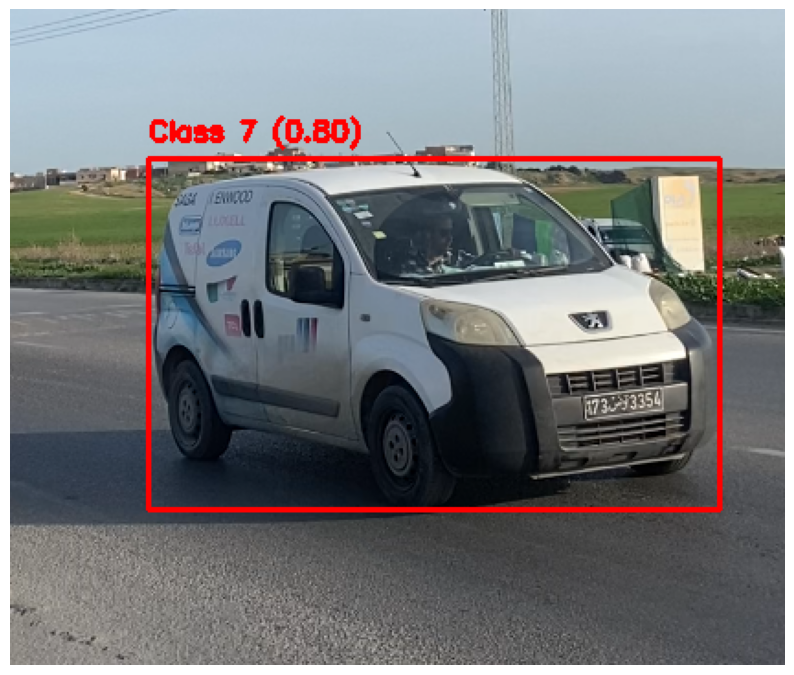

JSON path: /content/annotations/4.json
Image path: /content/images/4.png


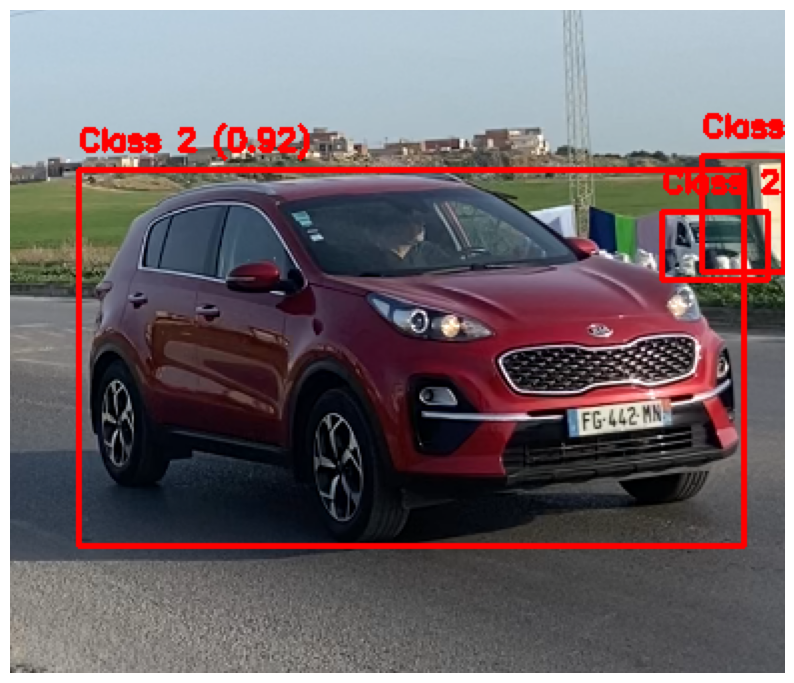

JSON path: /content/annotations/7.json
Image path: /content/images/7.png


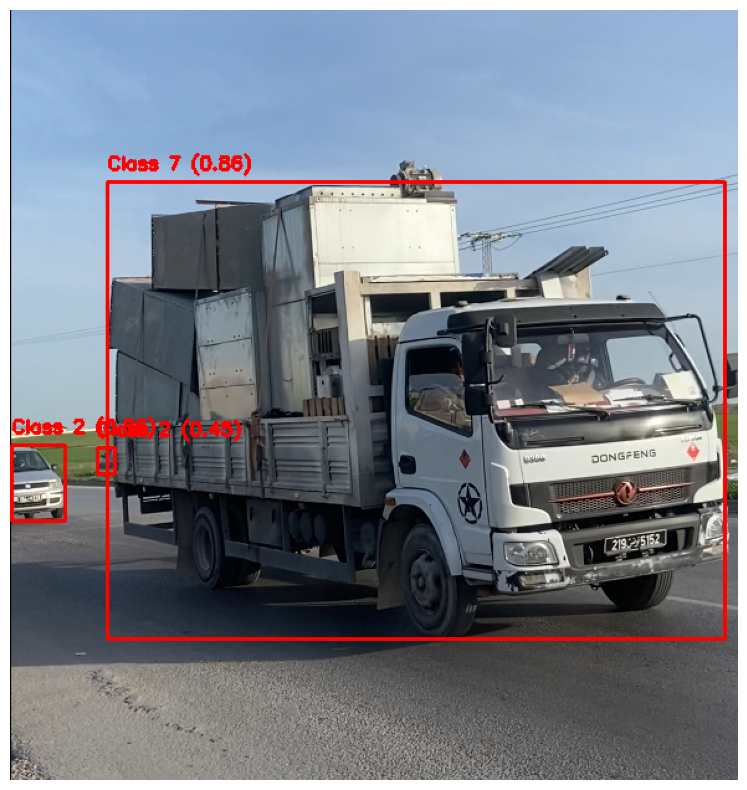

JSON path: /content/annotations/1.json
Image path: /content/images/1.png


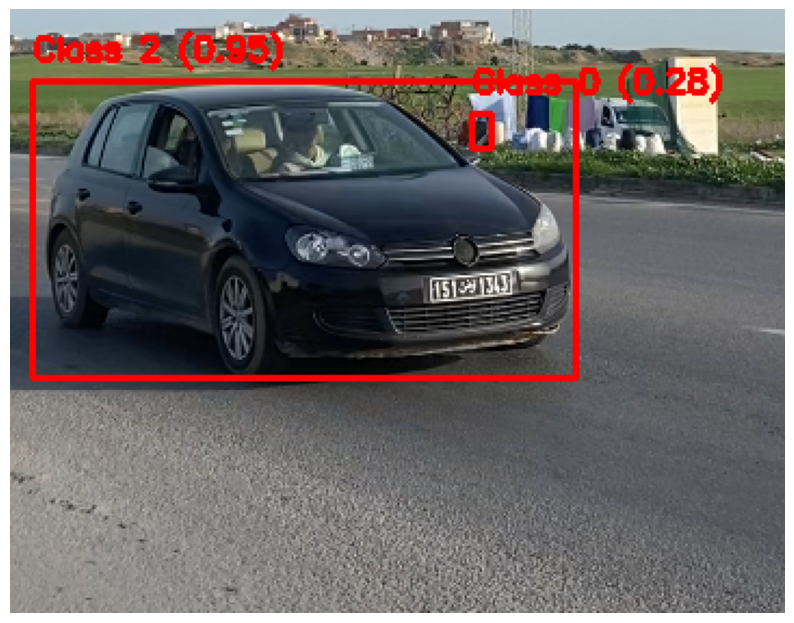

JSON path: /content/annotations/2.json
Image path: /content/images/2.png


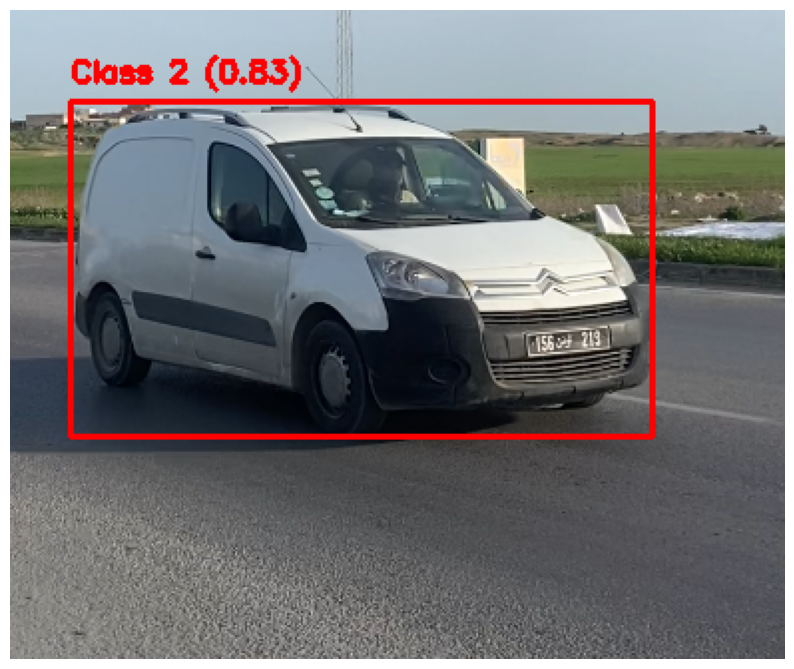

JSON path: /content/annotations/8.json
Image path: /content/images/8.png


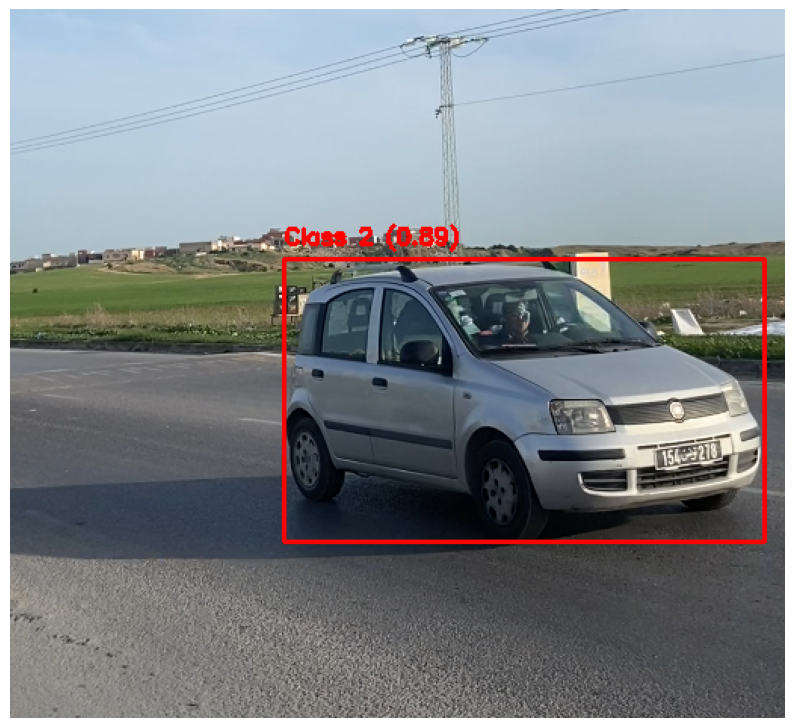

JSON path: /content/annotations/3.json
Image path: /content/images/3.png


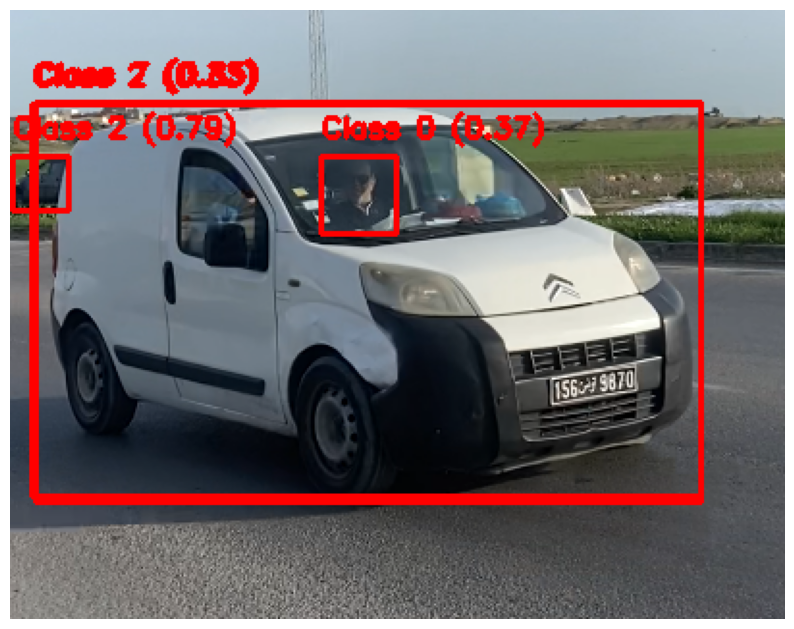

JSON path: /content/annotations/5.json
Image path: /content/images/5.png


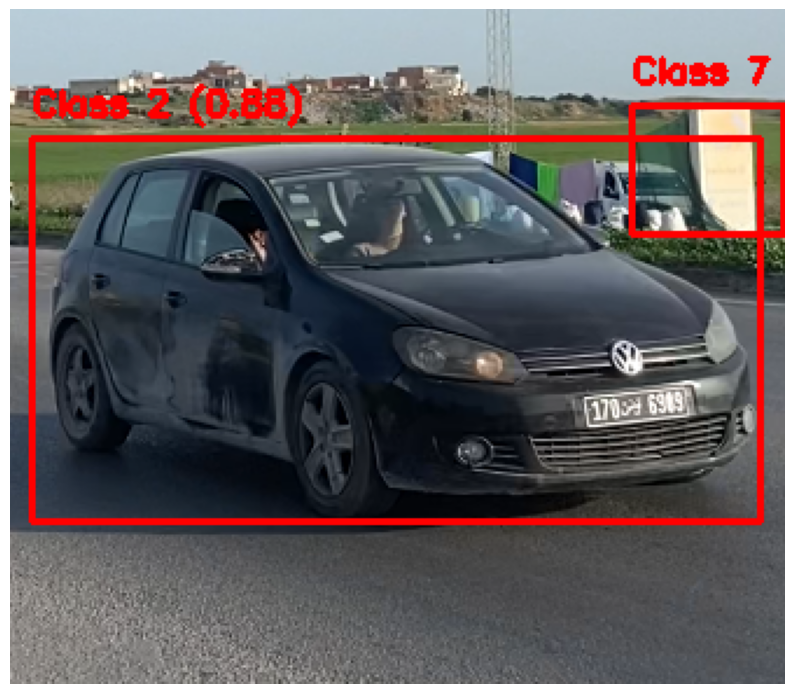

In [ ]:
import os

# Function to display image with bounding boxes from JSON annotations
def display_image_with_boxes_from_json(json_path, image_path):
    # Check if the image path exists
    if not os.path.exists(image_path):
        print(f"Image not found: {image_path}")
        return  # Skip processing if image doesn't exist

    # Load the image
    img = cv2.imread(image_path)

    # Check if the image is loaded successfully
    if img is None:
        print(f"Failed to load image: {image_path}")
        return

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR (OpenCV) to RGB (matplotlib)

    # Load the JSON file with annotations
    with open(json_path, 'r') as f:
        data = json.load(f)

    # Draw the bounding boxes from JSON data
    for detection in data['detections']:
        class_id = detection['class_id']
        confidence = detection['confidence']
        x_center = detection['x_center']
        y_center = detection['y_center']
        width = detection['width']
        height = detection['height']

        # Convert normalized values to pixel values
        x_min = int((x_center - width / 2) * img.shape[1])
        y_min = int((y_center - height / 2) * img.shape[0])
        x_max = int((x_center + width / 2) * img.shape[1])
        y_max = int((y_center + height / 2) * img.shape[0])

        # Draw the bounding box and label on the image
        cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)
        label = f"Class {class_id} ({confidence:.2f})"
        cv2.putText(img, label, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Display the image with annotations
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Iterate over JSON files and display the images with bounding boxes
for json_file in os.listdir(output_dir):
    if json_file.endswith('.json'):
        json_path = os.path.join(output_dir, json_file)
        img_file = json_file.replace('.json', '.png')  # Assuming image extension is .png, change if necessary
        img_path = os.path.join(images_dir, img_file)

        # Print paths for debugging
        print(f"JSON path: {json_path}")
        print(f"Image path: {img_path}")

        # Display image with bounding boxes
        display_image_with_boxes_from_json(json_path, img_path)
